In [50]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from sklearn.metrics import mean_squared_error

In [2]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [51]:
cd C:\Users\Hp\Desktop\Data analysis

C:\Users\Hp\Desktop\Data analysis


In [52]:
df = pd.read_excel("Superstore.xls")


In [28]:
phones = df.loc[df['Sub-Category'] == 'Phones']
phones.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
40,41,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,TEC-PH-10000486,Technology,Phones,Plantronics HL10 Handset Lifter,371.168,4,0.2,41.7564


In [53]:
phones['Order Date'].min(), phones['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [54]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
phones.drop(cols, axis=1, inplace=True)
phones = phones.sort_values('Order Date')
phones.isnull().sum()

KeyError: "['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit'] not found in axis"

In [55]:
phones

,Order Date,Sales
0,2014-01-06,1147.940
1,2014-01-16,124.200
2,2014-01-20,699.930
3,2014-01-26,343.330
4,2014-02-02,180.960
...,...,...
567,2017-12-25,90.480
568,2017-12-27,164.388
569,2017-12-28,14.850
570,2017-12-29,302.376


In [56]:
phones= phones.groupby('Order Date')['Sales'].sum().reset_index()

In [57]:
phones = phones.set_index('Order Date')
phones.index

DatetimeIndex(['2014-01-06', '2014-01-16', '2014-01-20', '2014-01-26',
               '2014-02-02', '2014-02-06', '2014-03-01', '2014-03-03',
               '2014-03-11', '2014-03-16',
               ...
               '2017-12-14', '2017-12-15', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=572, freq=None)

In [58]:
y = phones['Sales'].resample('SM').mean()

In [59]:
y['2017':]

Order Date
2017-01-15     914.104250
2017-01-31     186.851500
2017-02-15     433.744000
2017-02-28     267.490857
2017-03-15     456.325111
2017-03-31     555.425000
2017-04-15     475.455333
2017-04-30     507.430667
2017-05-15     535.090286
2017-05-31     232.828667
2017-06-15    1049.252800
2017-06-30     619.913750
2017-07-15     695.546571
2017-07-31     604.828571
2017-08-15     776.675429
2017-08-31     775.495333
2017-09-15    1003.198444
2017-09-30     223.877333
2017-10-15     766.400667
2017-10-31     670.706500
2017-11-15     770.782833
2017-11-30     668.304909
2017-12-15     259.304222
Freq: SM-15, Name: Sales, dtype: float64

In [60]:
y.fillna(0, inplace=True)

In [61]:
y['2017']

Order Date
2017-01-15     914.104250
2017-01-31     186.851500
2017-02-15     433.744000
2017-02-28     267.490857
2017-03-15     456.325111
2017-03-31     555.425000
2017-04-15     475.455333
2017-04-30     507.430667
2017-05-15     535.090286
2017-05-31     232.828667
2017-06-15    1049.252800
2017-06-30     619.913750
2017-07-15     695.546571
2017-07-31     604.828571
2017-08-15     776.675429
2017-08-31     775.495333
2017-09-15    1003.198444
2017-09-30     223.877333
2017-10-15     766.400667
2017-10-31     670.706500
2017-11-15     770.782833
2017-11-30     668.304909
2017-12-15     259.304222
Freq: SM-15, Name: Sales, dtype: float64

In [77]:
y

Order Date
2013-12-31    1147.940000
2014-01-15     389.153333
2014-01-31     243.760000
2014-02-15       0.000000
2014-02-28     201.300000
                 ...     
2017-10-15     766.400667
2017-10-31     670.706500
2017-11-15     770.782833
2017-11-30     668.304909
2017-12-15     259.304222
Freq: SM-15, Name: Sales, Length: 96, dtype: float64

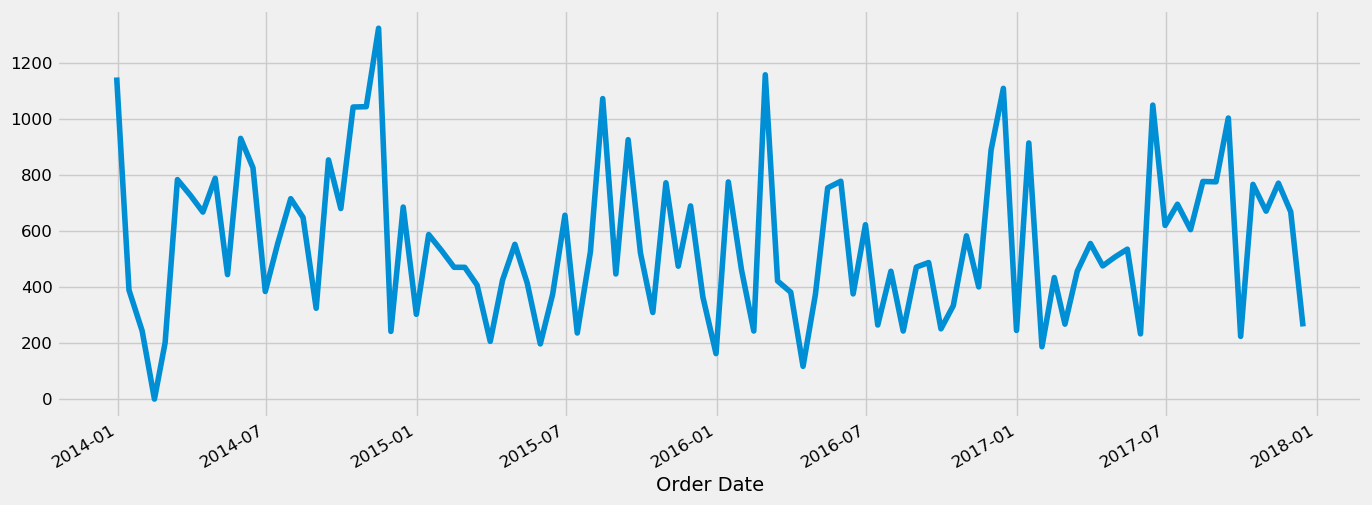

In [62]:
y.plot(figsize=(15, 6))
plt.show()

In [63]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [64]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [65]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1490.5370951914956
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1273.0058590810004
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1230.0858019449163
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1014.2770611362662
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1240.0953286322554
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1195.0653689453004
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1045.765042373043
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1015.1772072561025
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1431.3369921058274
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1240.391985244312
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1217.886069200702
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1002.5475547764219
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1241.9017642587578
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1182.7306289206351
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1047.7266785497907
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1003.1069632700338
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1378.6321537924455
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1206.102584451

In [66]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0215      0.132      0.162      0.871      -0.238       0.281
ar.S.L12      -0.4896      0.099     -4.966      0.000      -0.683      -0.296
sigma2      1.125e+05   2.31e+04      4.875      0.000    6.73e+04    1.58e+05


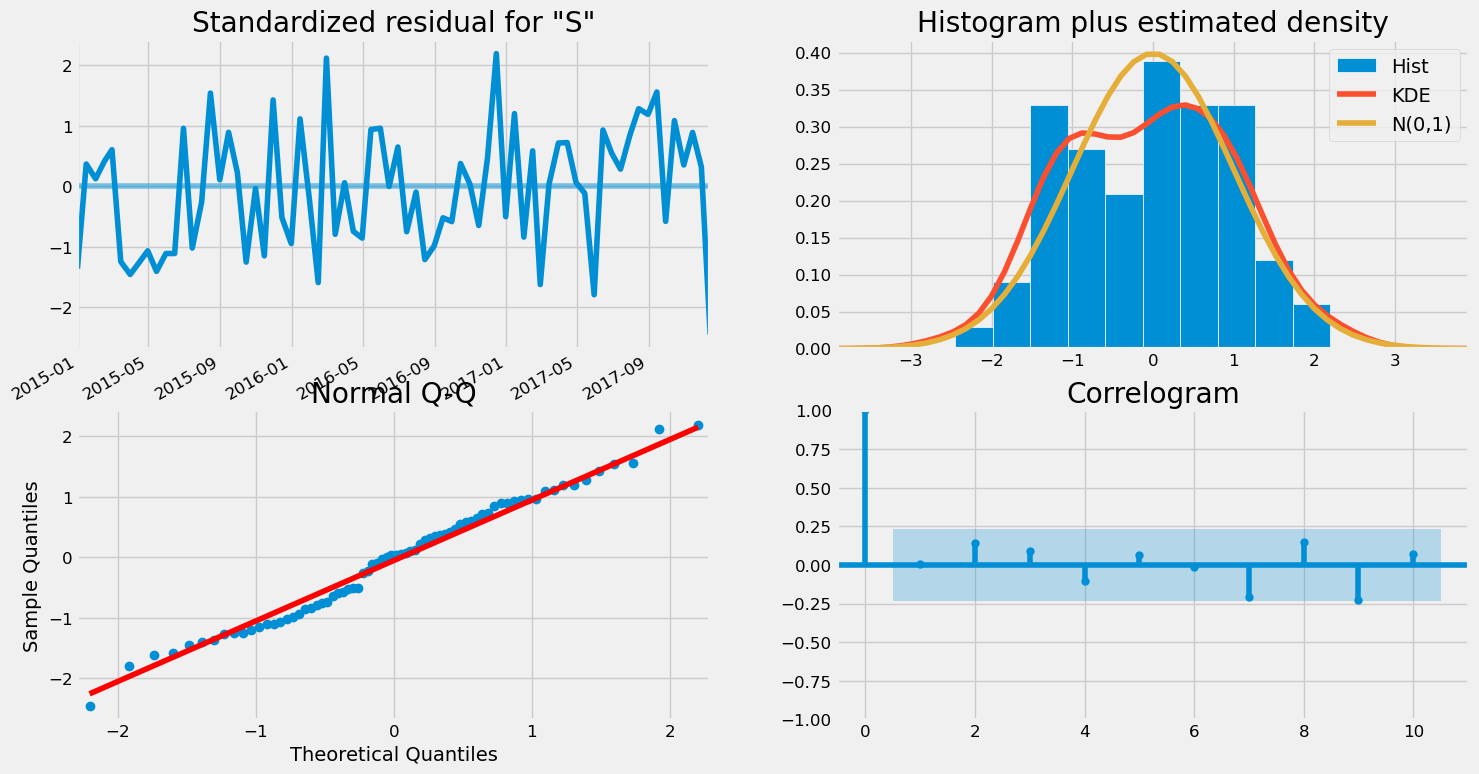

In [67]:
results.plot_diagnostics(figsize=(16, 10))
plt.show()

In [84]:
forecast_periods = 12  # Change this to your desired number of periods

# Generate forecasts for future periods
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [85]:
last_date = y.index[-1]

# Create a date range for the future forecast periods
future_dates = pd.date_range(start=last_date, periods=forecast_periods+1, freq='W')[1:]

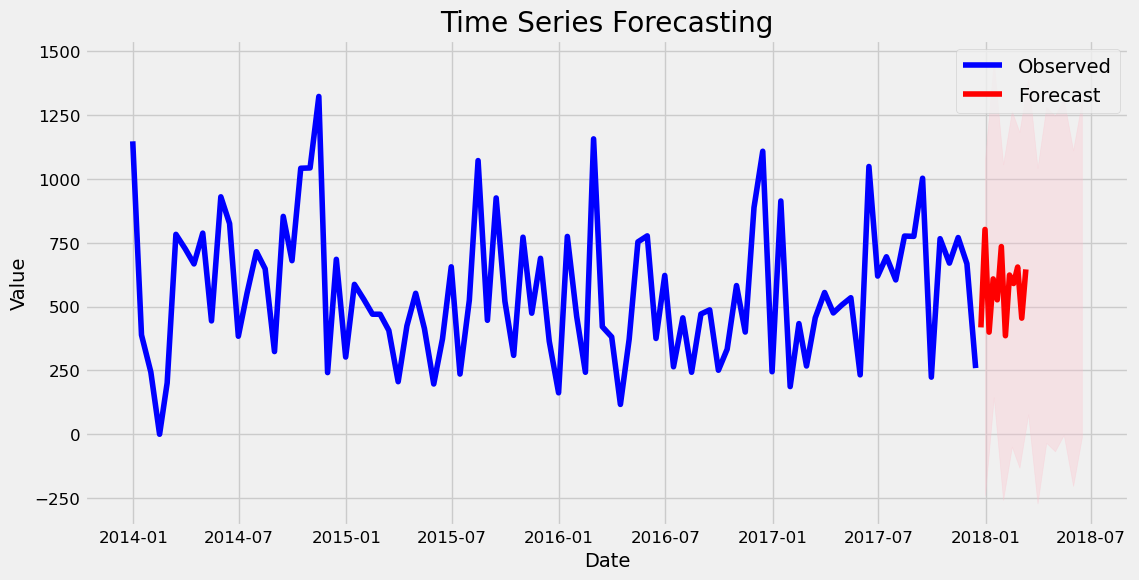

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(y, label='Observed', color='blue')

# Plot the forecasted data
plt.plot(future_dates, forecast_mean, label='Forecast', color='red')

# Fill the area between the confidence intervals
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecasting')

# Add a legend
plt.legend()

# Show the plot
plt.show()





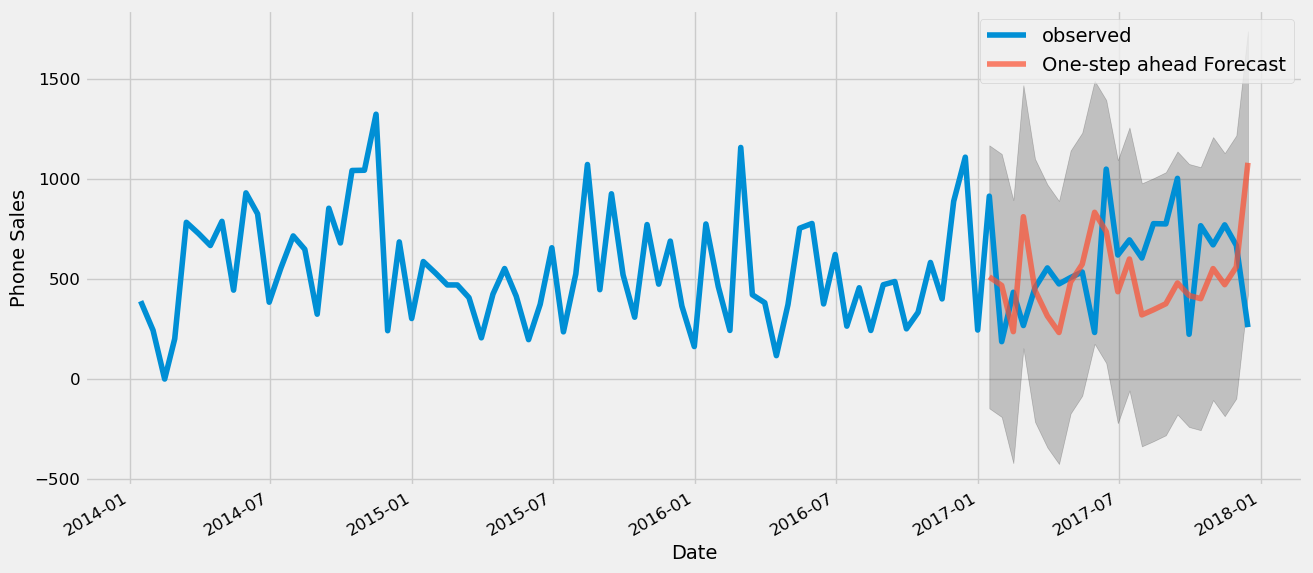

In [68]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-15'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Phone Sales')
plt.legend()
plt.show()

In [87]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 124136.32


In [70]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 352.33


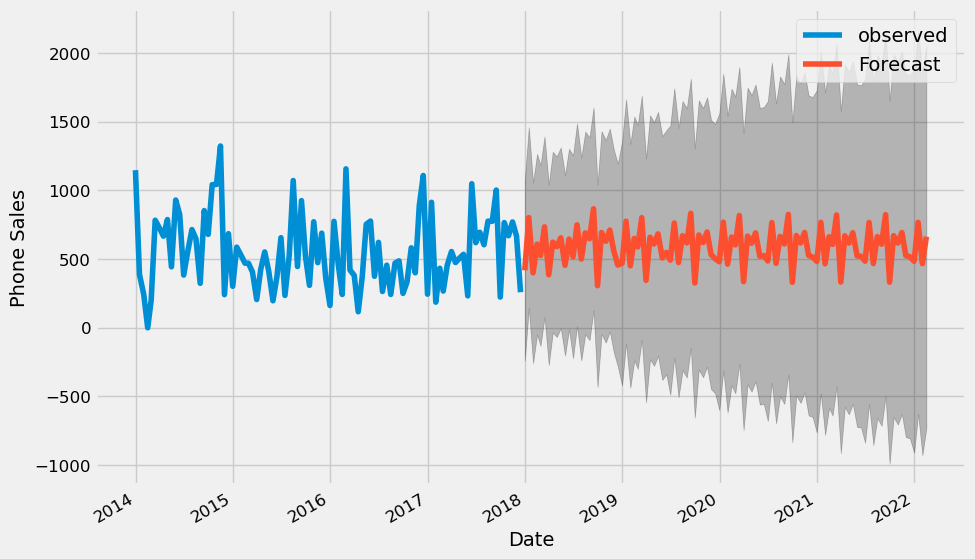

In [71]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(10, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Phone Sales')
plt.legend()
plt.show()

In [72]:
phones = df.loc[df['Sub-Category'] == 'Phones']
accessories = df.loc[df['Sub-Category'] == 'Accessories']
phones.shape, accessories.shape

((889, 21), (775, 21))

In [73]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
phones.drop(cols, axis=1, inplace=True)


In [74]:
accessories.drop(cols, axis=1, inplace=True)

In [75]:
accessories

,Order Date,Sales
26,2016-01-16,90.57
44,2016-03-11,45.98
47,2016-06-20,45.00
59,2016-06-17,30.00
62,2015-11-24,13.98
...,...,...
9949,2017-06-01,83.97
9950,2017-06-01,39.89
9960,2017-09-16,18.00
9986,2016-09-29,36.24


In [76]:
phones

,Order Date,Sales
7,2014-06-09,907.152
11,2014-06-09,911.424
19,2014-08-27,213.480
35,2016-12-08,1097.544
40,2015-12-27,371.168
...,...,...
9973,2016-12-06,271.960
9976,2016-12-06,249.584
9983,2016-09-22,97.980
9988,2017-11-17,206.100


In [49]:
phones = phones.sort_values('Order Date')
accessories = accessories.sort_values('Order Date')
phones = phones.groupby('Order Date')['Sales'].sum().reset_index()
accessories = accessories.groupby('Order Date')['Sales'].sum().reset_index()

In [23]:
phones = phones.set_index('Order Date')
accessories = accessories.set_index('Order Date')
y_phones = phones['Sales'].resample('SM').mean()
y_accessories = accessories['Sales'].resample('SM').mean()
phones = pd.DataFrame({'Order Date':y_phones.index, 'Sales':y_phones.values})
accessories = pd.DataFrame({'Order Date': y_accessories.index, 'Sales': y_accessories.values})
store = phones.merge(accessories, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'phones_sales', 'Sales_y': 'accessories_sales'}, inplace=True)
store

KeyError: "None of ['Order Date'] are in the columns"

In [ ]:
phones.fillna(0, inplace=True)

In [ ]:
accessories.fillna(0, inplace=True)

In [ ]:
phones

In [ ]:
accessories

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['phones_sales'], 'b-', label = 'phones')
plt.plot(store['Order Date'], store['accessories_sales'], 'r-', label = 'accessories')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of phones and accessories')
plt.legend();

In [21]:
from prophet import Prophet
phones = phones.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
phones_model = Prophet(interval_width=0.95)
phones_model.fit(phones)
accessories = accessories.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
accessories_model = Prophet(interval_width=0.95)
accessories_model.fit(accessories)
phones_forecast = phones_model.make_future_dataframe(periods=36, freq='MS')
phones_forecast = phones_model.predict(phones_forecast)
accessories_forecast = accessories_model.make_future_dataframe(periods=36, freq='MS')
accessories_forecast = accessories_model.predict(accessories_forecast)
plt.figure(figsize=(18, 6))
phones_model.plot(phones_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('phones Sales');

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [22]:
phones_names = ['phones_%s' % column for column in phones_forecast.columns]
accessories_names = ['accessories_%s' % column for column in accessories_forecast.columns]
merge_phones_forecast = phones_forecast.copy()
merge_accessories_forecast = accessories_forecast.copy()
merge_phones_forecast.columns = phones_names
merge_accessories_forecast.columns = accessories_names
forecast = pd.merge(merge_phones_forecast, merge_accessories_forecast, how = 'inner', left_on = 'phones_ds', right_on = 'accessories_ds')
forecast = forecast.rename(columns={'phones_ds': 'Date'}).drop('accessories_ds', axis=1)
forecast.head()

NameError: name 'phones_forecast' is not defined